![crack](https://www.deltawines.eu/assets/files/shutterstock-532006042-72-1.1920x0.jpg)

# Wine Grading

Let's practice Decision Trees & Random Forest on a super cool dataset. We'll be trying to predict the quality of a given wine! 

Your goal will be to:

1. Preprocess the data
2. Create a classification algorithm

Happy Coding!

## Step 1 - Import Data 🤹‍♀️

- Import usual librairies

In [171]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression



from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

- Import `Wine_grading.csv` and visualize dataset

In [172]:
df = pd.read_csv("./assets/ML/Wine_grading.csv")
df.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


- Remove `Unnamed:0` column from the dataset

In [173]:
df = df.iloc[:, 1:]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Step 2 - EDA 📊

- Visualize `alcohol` and `Grade`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

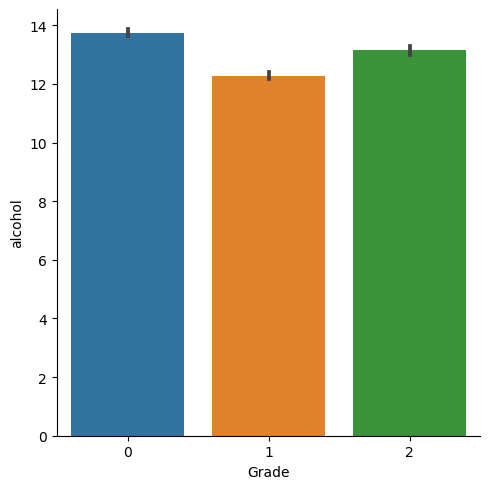

In [174]:
sns.catplot(x="Grade", y="alcohol",data=df, kind="bar")

- Visualize `magnesium` and `Grade`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

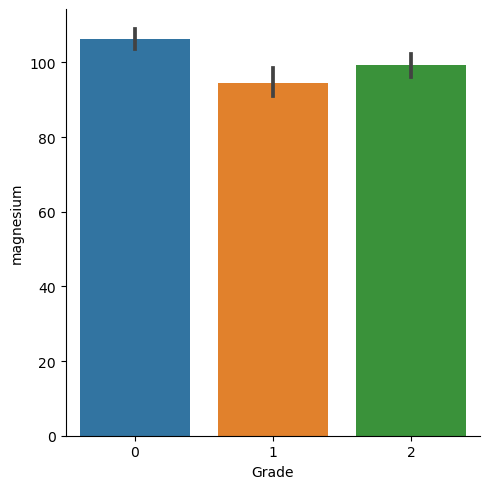

In [175]:
sns.catplot(x="Grade", y="magnesium",data=df, kind="bar")

- Visualize `color_intensity` and `Grade`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

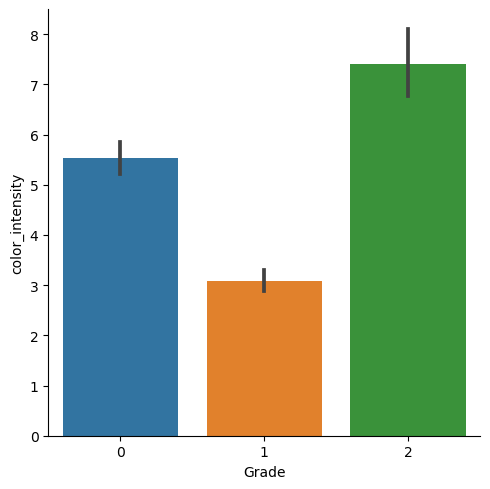

In [176]:
sns.catplot(x="Grade", y="color_intensity",data=df, kind="bar")

* Show your dataset main statistics

In [177]:
df.describe(include="all")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


- Let's take a look to missing values

In [178]:
df.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
Grade                           False
dtype: bool

## Step 3 - Preprocessing 🍳

- Split your dataset by $X$ and $y$

In [179]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = df.columns[:-1]

X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"Grade"] # We set "Profit" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



- Split your data in train and test sets

In [180]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


- Make all the required preprocessings on the train set

In [181]:
# Encoding categorical features and standardizing numeric features
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables

# This is a list comprehension (too complex for students)

numeric_features = [i  for i,item in enumerate(X_train.columns)]

numeric_features = list(range(13))
numeric_transformer = StandardScaler()

"""
categorical_features = [1, 6] 
categorical_transformer = OneHotEncoder()
"""

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        #('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,0:3]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

#### X_train BEFORE preprocessing ####
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
84     11.84        0.89  2.58               18.0       94.0           2.20   
11     14.12        1.48  2.32               16.8       95.0           2.20   
168    13.58        2.58  2.69               24.5      105.0           1.55   
138    13.49        3.59  2.19               19.5       88.0           1.62   
86     12.16        1.61  2.31               22.8       90.0           1.78   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
84         2.21                  0.22             2.35             3.05  0.79   
11         2.43                  0.26             1.57             5.00  1.17   
168        0.84                  0.39             1.54             8.66  0.74   
138        0.48                  0.58             0.88             5.70  0.81   
86         1.69                  0.43             1.56             2.45  1.33   


## Build your model 🏋️‍♂️

- Create your Logistic Regression model

In [182]:
# Train model
print("Train model...")
classifier = DecisionTreeClassifier()
#classifier = LogisticRegression()
classifier.fit(X_train, y_train) # This steps is the actual training !
y_train_pred = classifier.predict(X_train)
print("...Done.")

Train model...
...Done.


- Evaluate it (don't forget to preprocess X_test)

In [183]:
## Testing pipeline ###
print("--- Testing pipeline ---")

# Copy X_train to avoid caveats
X_test = X_test.copy()


# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()


print("Final accuracy score on Test set: ",classifier.score(X_test, y_test))

--- Testing pipeline ---
Standardizing numerical features...
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
64     12.17        1.45  2.53               19.0      104.0           1.89   
36     13.28        1.64  2.84               15.5      110.0           2.60   
60     12.33        1.10  2.28               16.0      101.0           2.05   
39     14.22        3.99  2.51               13.2      128.0           3.00   
76     13.03        0.90  1.71               16.0       86.0           1.95   
157    12.45        3.03  2.64               27.0       97.0           1.90   
147    12.87        4.61  2.48               21.5       86.0           1.70   
21     12.93        3.80  2.65               18.6      102.0           2.41   
117    12.42        1.61  2.19               22.5      108.0           2.00   
54     13.74        1.67  2.25               16.4      118.0           2.60   
148    13.32        3.24  2.38               21.5       92.0          

- Look at your model scores on train and test

In [184]:
print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

Train score:  1.0
Test score:  0.8888888888888888


- What can you say about it ?

In [185]:
# Overfitting ! 

- Create the confusion matrix with `plot_confusion_matrix`

--- Assessment of performances ---


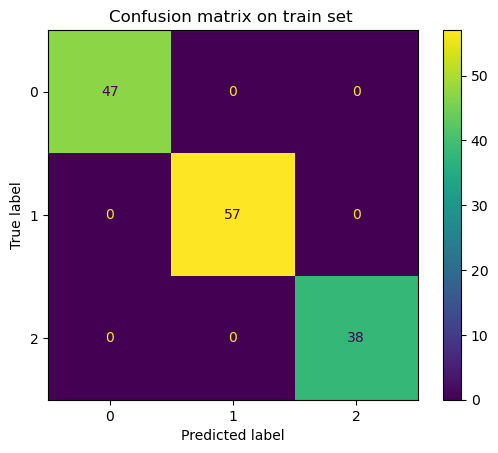

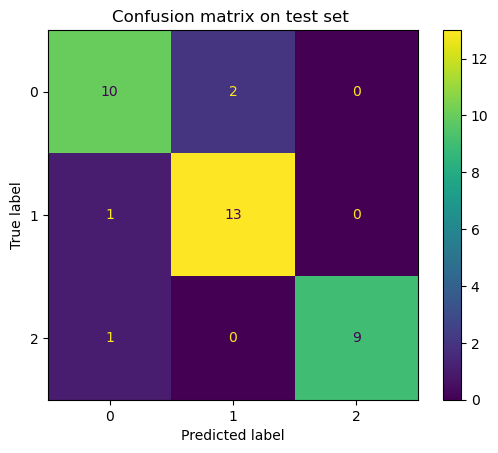

In [186]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") 
plt.show() 

# cm = plot_confusion_matrix(classifier, X_train, y_train)
# cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
# plt.show() # Show graph
# print("accuracy-score on train set : ", classifier.score(X_train, y_train))





cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 


# cm = plot_confusion_matrix(classifier, X_test, y_test)
# cm.ax_.set_title("Confusion matrix on test set ")
# plt.show() # Show graph
# print("accuracy-score on test set : ", classifier.score(X_test, y_test))

- Create a dataframe with features importance

* Our model is overfitting. Let's try to play with parameters. Using [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier) try to: 
    * Increase `min_samples_split`
    * Play around with other parameters if you want to better optimize your model! 🔧

In [188]:
# Train model
print("Train model...")
classifier = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")


print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix


# cm = plot_confusion_matrix(classifier, X_train, y_train)
# cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
# plt.show() # Show graph
# print("accuracy-score on train set : ", classifier.score(X_train, y_train))





# cm = plot_confusion_matrix(classifier, X_test, y_test)
# cm.ax_.set_title("Confusion matrix on test set ")
# plt.show() # Show graph
# print("accuracy-score on test set : ", classifier.score(X_test, y_test))

Train model...
...Done.
Train score:  0.9154929577464789
Test score:  0.8888888888888888
--- Assessment of performances ---


## Bonus 1 - Feature Importance 🏄‍♂️

* Try to visualize feature importance of your decision tree

numerical columns are:  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

All column names are:  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')



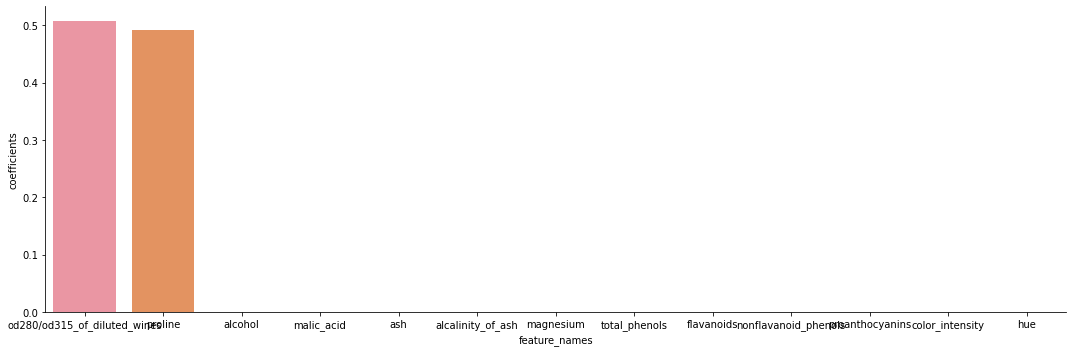

In [ ]:

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)
print()

# Append all columns 
all_column_names = numerical_column_names
print("All column names are: ",all_column_names)
print()

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.feature_importances_ # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})


# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=30/10) # Resize graph

## Bonus 2 - Try a Random Forest 🏄‍♂️

* Do you think a Random Forest can do better? 

Train model...
...Done.
Train score:  0.9436619718309859
Test score:  0.9166666666666666
--- Assessment of performances ---


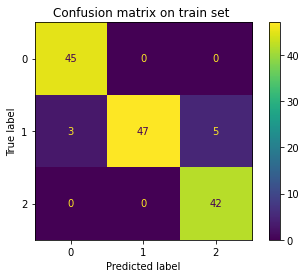

accuracy-score on train set :  0.9436619718309859


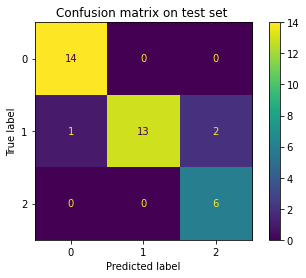

accuracy-score on test set :  0.9166666666666666


In [ ]:
# Train model
print("Train model...")
classifier = RandomForestClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")


print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

## Bonus 3 [For the coding warriors] - Visualize your decision tree 🏄‍♂️

* Did you know that you can visualize an actual decision tree? 
    * Check out this [documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py) and try to do it with your Decision 
    * Careful, it doesn't work for Random Forests 🙏

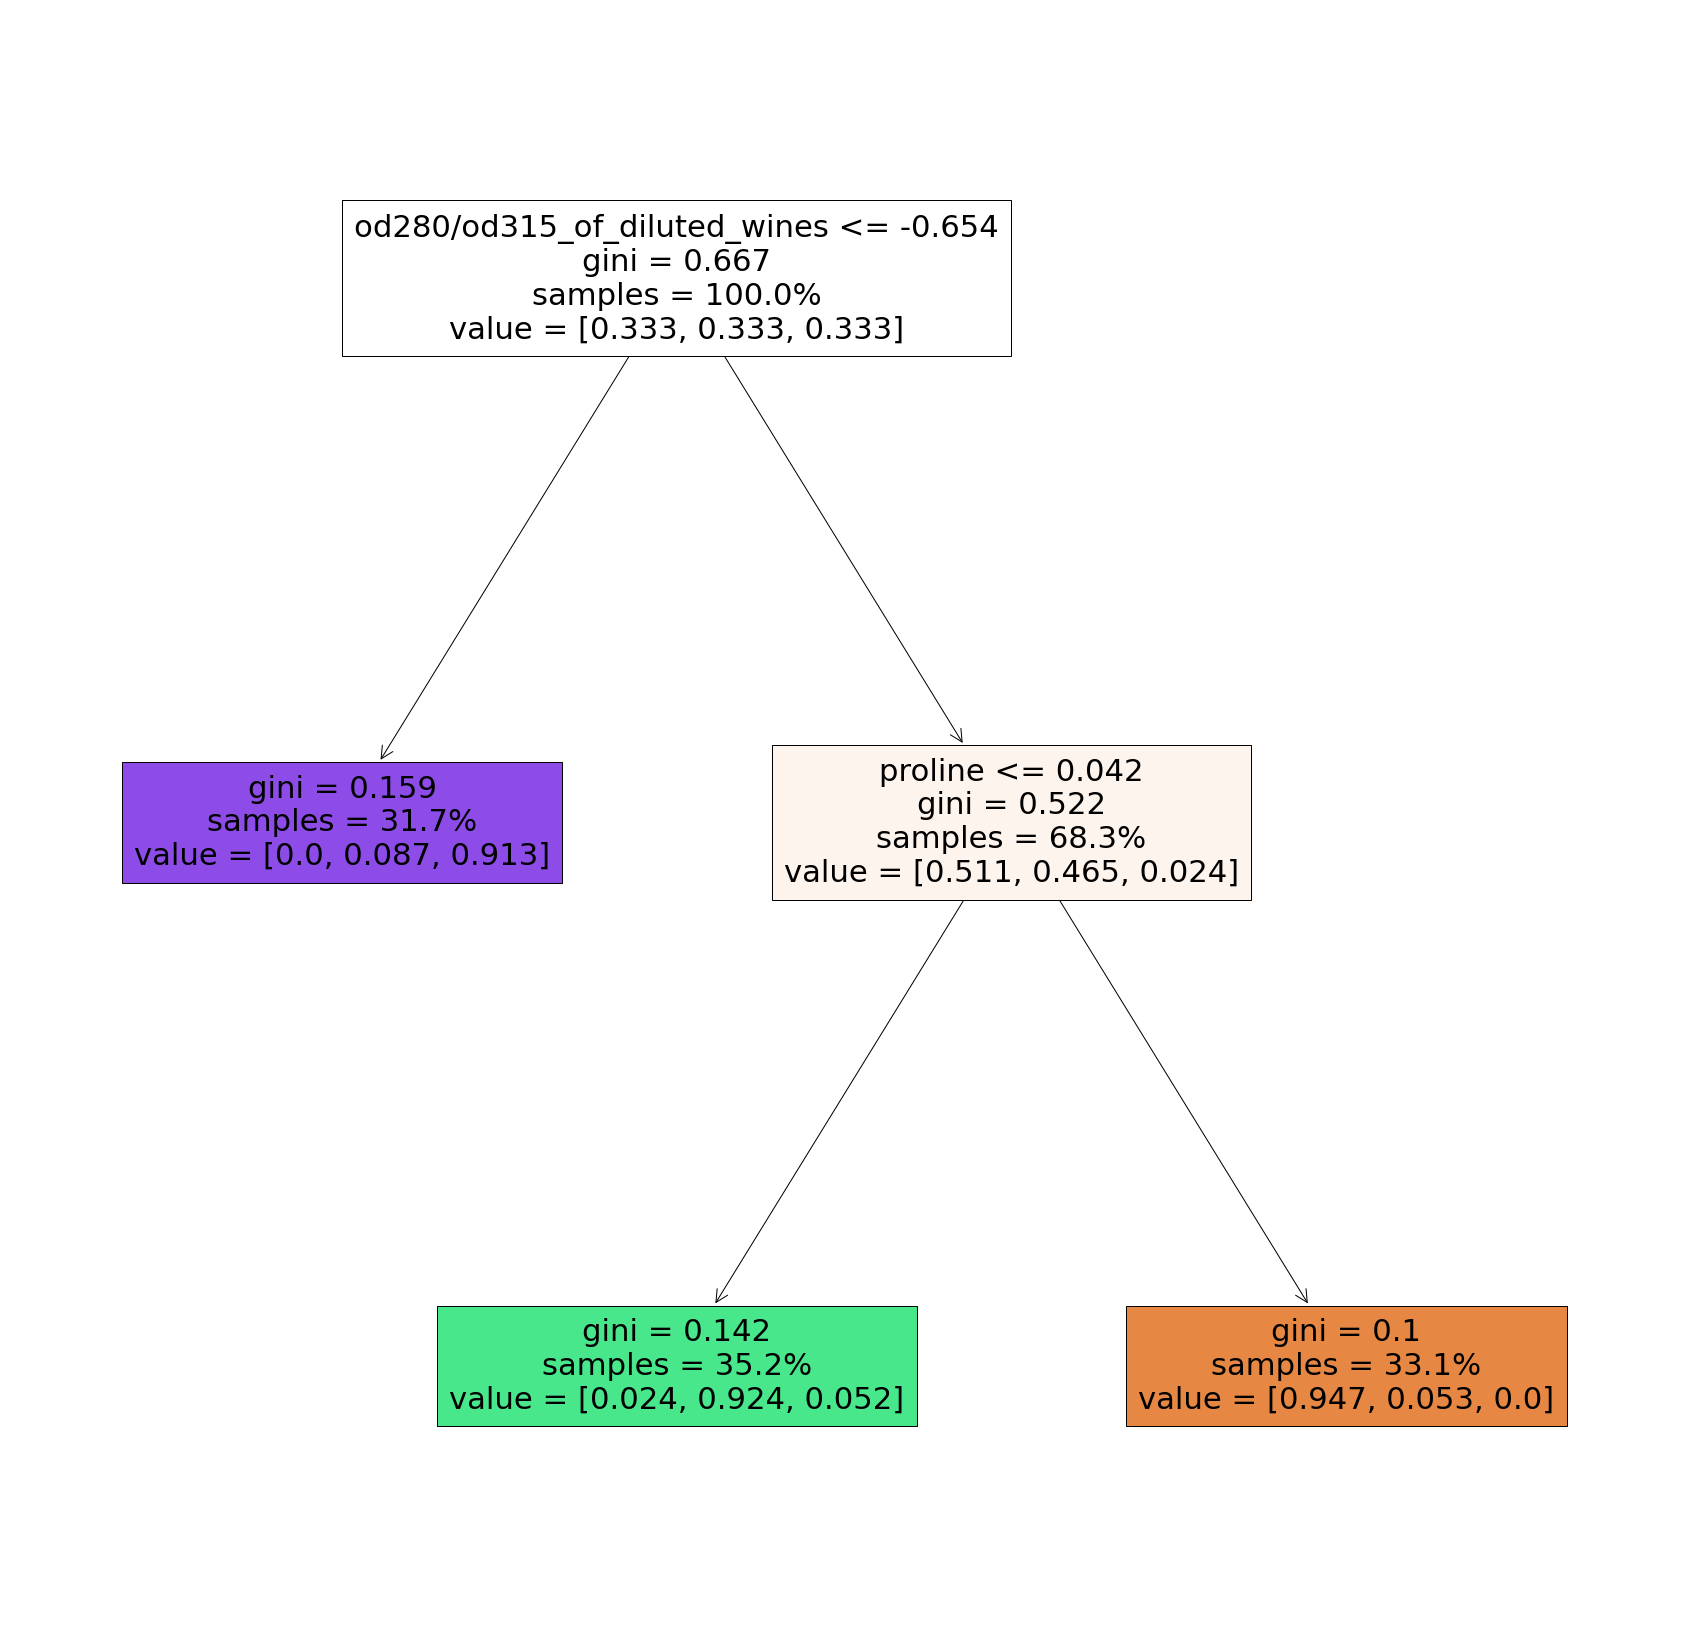

In [ ]:
from sklearn.tree import plot_tree

classifier = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(X_train, y_train) # This steps is the actual training !


_, ax = plt.subplots(figsize=(30,30)) # Resize figure
plot_tree(classifier, filled=True, feature_names=all_column_names, proportion=True,ax=ax)
plt.show()